# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # Raw format from the api call
        city_date = time.strftime('%Y-%m-%d', city_date_struct) # Formatted so it can be readable to humans

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | corner brook
Processing Record 2 of Set 1 | nurota
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | piti village
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | bardai
Processing Record 8 of Set 1 | vilyuchinsk
Processing Record 9 of Set 1 | rio gallegos
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | sao felix do xingu
Processing Record 12 of Set 1 | bozoum
Processing Record 13 of Set 1 | suicheng
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | umea
Processing Record 17 of Set 1 | aginskoye
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | urzhar
Processing Record 21 of Set 1 | swellendam
Processing Record 22 of Set 1 | erenhot
Processing Record 23 of Set 1 | o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    corner brook  48.9667  -57.9484     -1.02        92          96   
1          nurota  40.5614   65.6886     13.04        88          80   
2         udachny  66.4167  112.4000    -20.38        99          99   
3       adamstown -25.0660 -130.1015     23.86        80         100   
4    piti village  13.4626  144.6933     28.19        68          20   
..            ...      ...       ...       ...       ...         ...   
560      maragogi  -9.0122  -35.2225     26.44        73          10   
561     salahonda   2.1019  -78.7217     27.51        82          93   
562       harstad  68.7990   16.5293      3.32        54           0   
563      akrehamn  59.2667    5.1833      6.23        75          75   
564   chibougamau  49.9168  -74.3659    -11.21        80           0   

     Wind Speed Country        Date  
0          1.25      CA  2025-03-23  
1          3.76      UZ  2025-03-23  
2          2.95      

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,corner brook,48.9667,-57.9484,-1.02,92,96,1.25,CA,2025-03-23
1,nurota,40.5614,65.6886,13.04,88,80,3.76,UZ,2025-03-23
2,udachny,66.4167,112.4000,-20.38,99,99,2.95,RU,2025-03-23
3,adamstown,-25.0660,-130.1015,23.86,80,100,10.35,PN,2025-03-23
4,piti village,13.4626,144.6933,28.19,68,20,7.20,GU,2025-03-23


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,corner brook,48.9667,-57.9484,-1.02,92,96,1.25,CA,2025-03-23
1,nurota,40.5614,65.6886,13.04,88,80,3.76,UZ,2025-03-23
2,udachny,66.4167,112.4000,-20.38,99,99,2.95,RU,2025-03-23
3,adamstown,-25.0660,-130.1015,23.86,80,100,10.35,PN,2025-03-23
4,piti village,13.4626,144.6933,28.19,68,20,7.20,GU,2025-03-23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

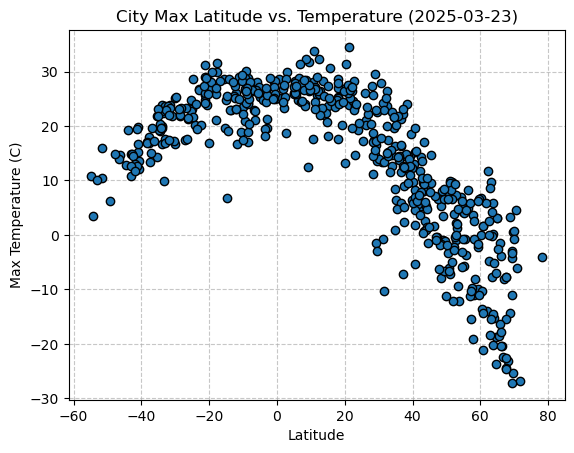

In [15]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

from datetime import date
today = date.today()

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

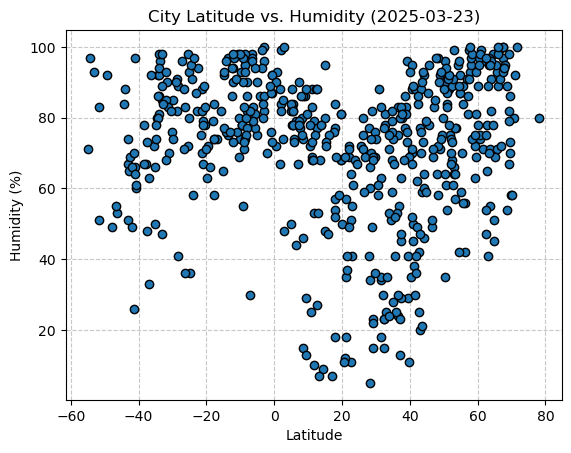

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

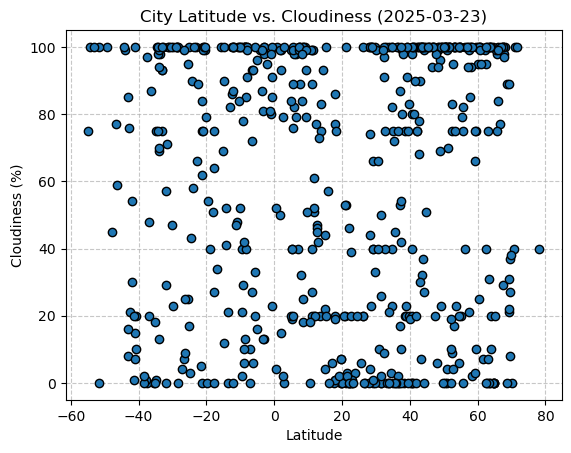

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

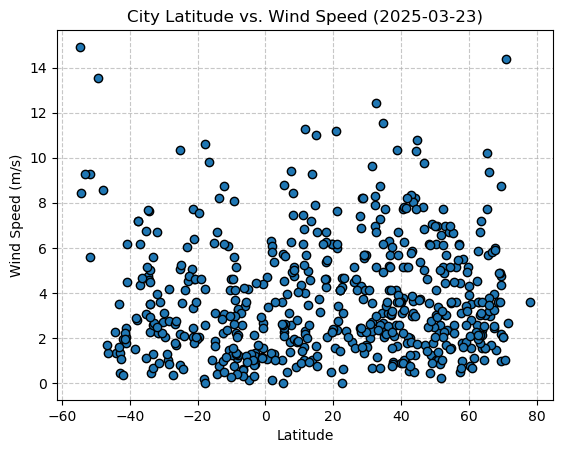

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  

    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    regress_values = x * slope + intercept
    #print(regress_values)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

# Create Plot
    plt.scatter(x,y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})") 
    plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7) 
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,corner brook,48.9667,-57.9484,-1.02,92,96,1.25,CA,2025-03-23
1,nurota,40.5614,65.6886,13.04,88,80,3.76,UZ,2025-03-23
2,udachny,66.4167,112.4000,-20.38,99,99,2.95,RU,2025-03-23
4,piti village,13.4626,144.6933,28.19,68,20,7.20,GU,2025-03-23
5,utrik,11.2278,169.8474,26.95,69,99,7.47,MH,2025-03-23


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,23.86,80,100,10.35,PN,2025-03-23
8,rio gallegos,-51.6226,-69.2181,16.03,51,0,9.26,AR,2025-03-23
10,sao felix do xingu,-6.6447,-51.9950,22.88,98,93,0.60,BR,2025-03-23
13,port-aux-francais,-49.3500,70.2167,6.16,92,100,13.55,TF,2025-03-23
18,cidreira,-30.1811,-50.2056,25.18,76,47,2.69,BR,2025-03-23


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.8661694343814602 
p-value  :  1.970391070918774e-117 
std-error:  0.01843522852983301
y = -0.63x + 33.85


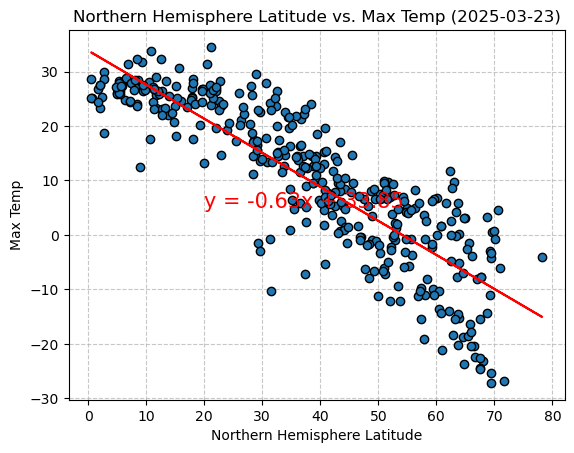

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value  :  0.6891871557352734 
p-value  :  1.0737026748653646e-26 
std-error:  0.020976501762091385
y = 0.27x + 27.9


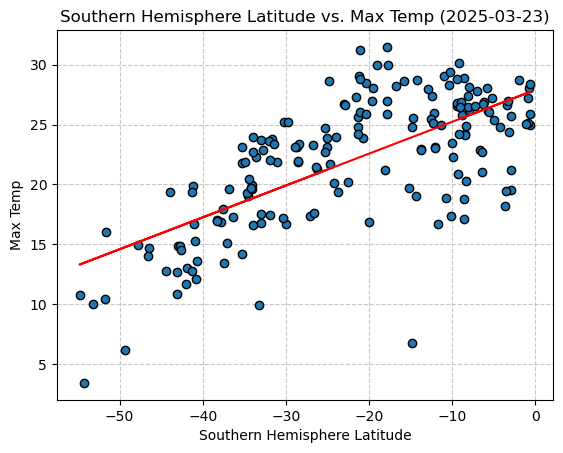

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** 

<p>r-value (correlation coefficient):</p>

<p>Value: <strong>-0.680638779261373</strong> for the Northern Hemisphere. This is a negative number close to 1, indicating a strong <strong>negative</strong> correlation between the latitude and max temperature. In simpler terms, as the values of latitude <strong>increase</strong>, the values of max temp tend to <strong>decrease</strong> as well. As latitudes increase (moving away from the equator towards the North Pole), the maximum temperatures tend to decrease as well. This again aligns with our expectation of colder temperatures at higher latitudes.</p>

<p>Value:<strong>0.7891320264061686</strong> for the Southern Hemisphere. This is a positive number close to 1, indicating a strong <strong>positive</strong> correlation between the latitude and max temperature. In simpler terms, as the values of latitude <strong>increase</strong>, the values of max temp tend to <strong>increase</strong> as well. As latitudes increase (moving away from the equator towards the South Pole), the maximum temperatures tend to increase as well. This aligns with our general understanding that the equator is typically warmer than the poles.</p>

### Humidity vs. Latitude Linear Regression Plot

r-value  :  0.2517311850736098 
p-value  :  5.613187739619157e-07 
std-error:  0.0567166792138171
y = 0.29x + 57.6


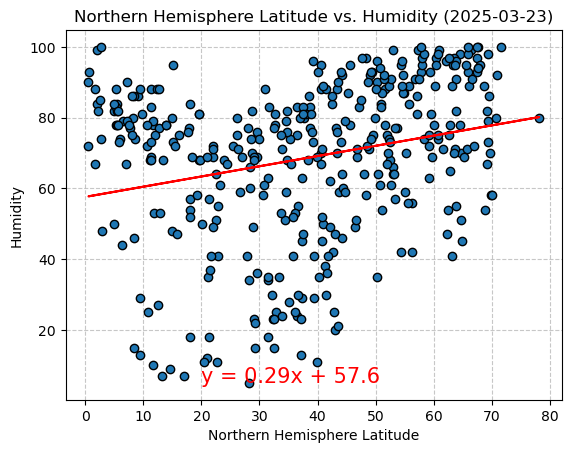

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value  :  0.32001101355093375 
p-value  :  1.1911448327277704e-05 
std-error:  0.0756699416049847
y = 0.34x + 86.67


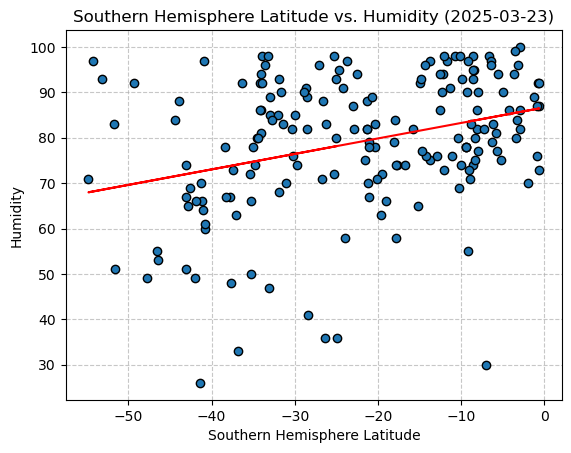

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** 

<p>r-value (correlation coefficient): (Northern Hemisphere) and (Southern Hemisphere). This value is very close to 0, signifying an almost negligible linear correlation and there's practically no linear trend between these variables based solely on the r-value.</p>

<p>p-value:(Northern Hemisphere). A p-value this high (greater than 0.05 for Northern Hemisphere) suggests that the observed r-value is likely due to <strong>random chance</strong> and not a true underlying relationship between latitude and humidity. There's weak evidence for a statistically significant connection. A p-value this low (typically below 0.05 for Southern Hemisphere) suggests that the observed r-value is statistically significant. </p>

<p>There's statistically no proof, based on these values, that increasing or decreasing latitude in the Northern Hemisphere has a corresponding linear increase or decrease in humidity.</p>

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  0.1277393821391004 
p-value  :  0.01212235645393844 
std-error:  0.1035268418800889
y = 0.26x + 47.25


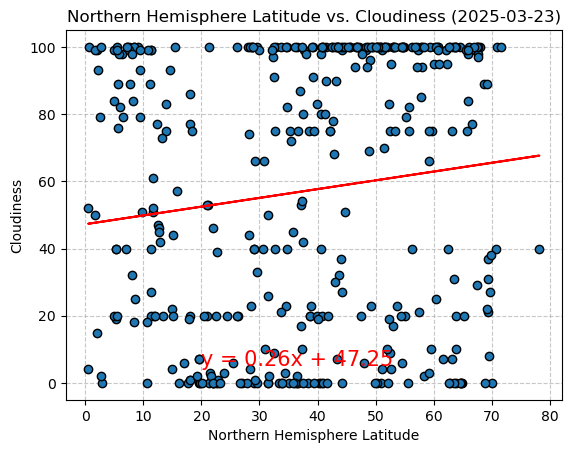

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value  :  0.11906999973466809 
p-value  :  0.11137766308481298 
std-error:  0.20076206008393518
y = 0.32x + 68.59


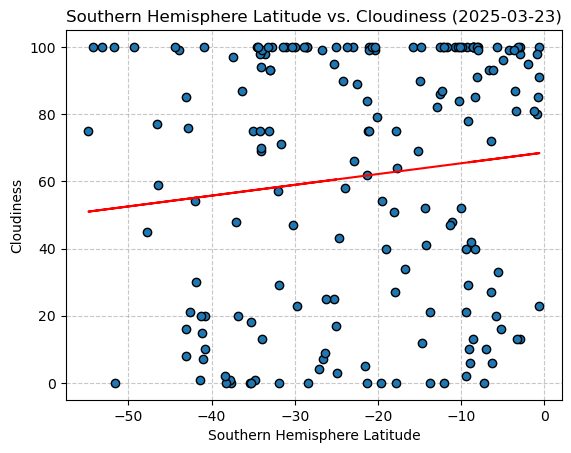

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** 

<p>r-value (correlation coefficient): (Northern Hemisphere). The value signifies an almost negligible correlation, either positive or negative. In this case, the slightly negative sign suggests a very weak tendency for cloudiness to decrease as latitude increases, but the magnitude is so small it's practically irrelevant.</p>

<p>p-value: (Northern Hemisphere). A p-value these levels suggests that the observed r-value is very likely due to random chance and not a true underlying relationship between cloudiness and latitude. There's very weak evidence for a statistically significant connection. p-value (for Southern Hemisphere) suggests that the observed r-value is statistically significant. This means it's less likely due to random chance and there might be a genuine underlying relationship between the variables.</p>

### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  -0.031427964708702565 
p-value  :  0.5386815631953354 
std-error:  0.006468495901076488
y = -0.0x + 4.08


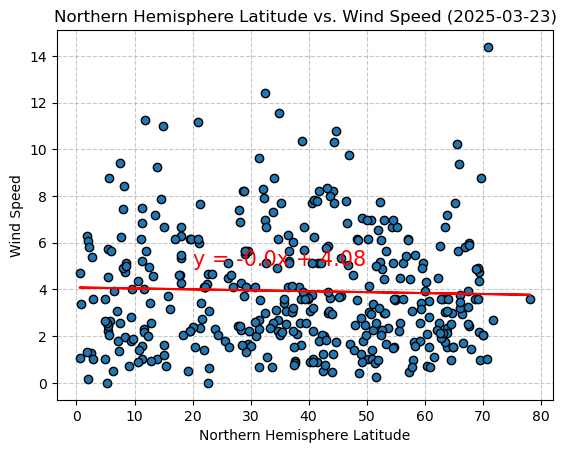

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value  :  -0.2961979713514884 
p-value  :  5.409339747183867e-05 
std-error:  0.013241842421091525
y = -0.05x + 2.1


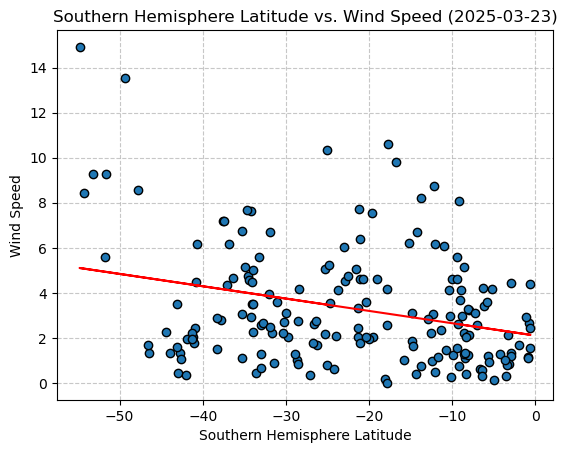

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')

**Discussion about the linear relationship:** 

<p>Lastly, for the correlaton between the latitude and wind speed values. r-value (correlation coefficient): (Northern Hemisphere) and (Southern Hemisphere). There's practically no linear relationship between the two variables based on these values.
Any slight positive or negative trend is so weak that it's likely just a random fluctuation in the data, not a genuine association.</p>